<a href="https://colab.research.google.com/github/PriteshPatel4739/Power-Allocation-in-NOMA-using-Machine-Learning/blob/main/PowerAllocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import math

**DEFINE BASE STATION**

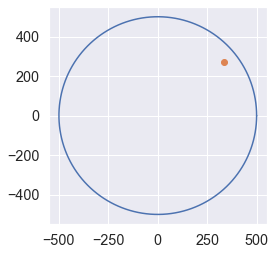

In [ ]:
x = random.randint(0,500)
y = random.randint(0,500)
theta = np.linspace( 0 , 2 * np.pi , 150 )

radius =500.00

a = radius * np.cos( theta )
b = radius * np.sin( theta )

figure,axes = plt.subplots(1)
# figure(figsize=(8, 6), dpi=80)

# plt.figure(figsize =(10, 10))
# axes = plt.subplots(1)
axes.plot( a, b )
axes.set_aspect( 1 )
plt.plot(x,y,'o')
plt.show()

**DEFINE 2 USERS**

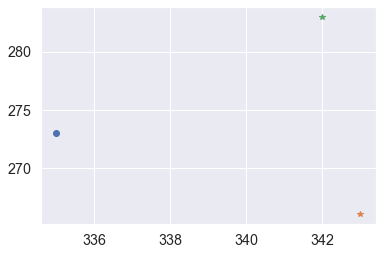

In [ ]:
# USER 1

x1 = random.randint(x-10,x+10)
y1 = random.randint(y-10,y+10)


# USER 2

x2 = random.randint(x-10,x+10)
y2 = random.randint(y-10,y+10)

plt.plot(x,y,'o',x1,y1,'*',x2,y2,'*')
plt.show()

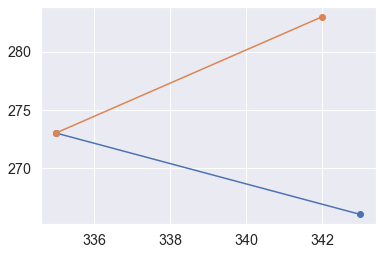

In [ ]:
import matplotlib.pyplot as plt
lx1, ly1 = [x,x1], [y,y1]
lx2, ly2 = [x, x2], [y, y2]
plt.plot(lx1, ly1, lx2, ly2, marker = 'o')
plt.show()

**DISTAANCE OF USER FROM BASE STATION**

In [ ]:
# DISTANCE USER 1
p = pow(x-x1,2)
q = pow(y-y1,2)
d1 = math.sqrt(p+q)
# DISTANCE USER 2

p = pow(x-x2,2)
q = pow(y-y2,2)
d2 = math.sqrt(p+q)

print(d1)
print(d2)

10.63014581273465
12.206555615733702


In [ ]:
import numpy as np

PK = np.random.exponential(scale=2.0, size=None)
PK

1.5242249355746527

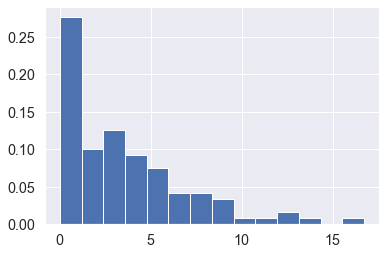

In [ ]:

# import exponential
import numpy as np
import matplotlib.pyplot as plt

# Using exponential() method
gfg = np.random.exponential(3.45, 100)

count, bins, ignored = plt.hist(gfg, 14, density = True)
plt.show()

**TOTAL FADING**

In [ ]:
c1 = random.randint(0,10)
c2 = random.randint(0,10)

fading1 = np.random.exponential(scale=2.0, size=None)
fading2 = np.random.exponential(scale=2.0, size=None)


total_fading1= fading1 * pow(d1,-3)
total_fading2= fading2 * pow(d2,-3)

print(total_fading1)
print(total_fading2)



0.0011579856588986497
0.0007419317194735181


**SNR**

In [ ]:
F = [0,5,10,15,20,25,30,35,40]
f_act = []

for i in F:
    a = pow(2,(i-30)/10)
    f_act.append(a)

f_act

[0.125,
 0.1767766952966369,
 0.25,
 0.3535533905932738,
 0.5,
 0.7071067811865476,
 1.0,
 1.4142135623730951,
 2.0]

CALCULATING POWER OF CELL CENTER USER AND CELL EDGE USER

In [ ]:
p_CCU = []
p_CEU = []
p_SNR = []
x = random.randint(0,500)
y = random.randint(0,500)
final_SNR = []
iter=20000
for j in range(0,9):

          out = []
          out_CEU = []
          for i in range(1,iter):
                x1 = random.randint(x-10,x+10)
                x2 = random.randint(x-10,x+10)

                y1 = random.randint(y-10,y+10)
                y2 = random.randint(y-10,y+10)

                if(x==x1):
                    x1 = random.randint(x-10,x+10)

                if(x==x2):
                    x2 = random.randint(x-10,x+10)

                if(y==y1):
                    y1 = random.randint(x-10,x+10)

                if(y==y2):
                    y2 = random.randint(x-10,x+10)


                h1 = np.random.exponential(scale=1.0, size=1)
                h2=np.random.exponential(scale=1.0, size=1)

                p = pow(x-x1,2)
                q = pow(y-y1,2)
                d1 = math.sqrt(p+q)
                  # DISTANCE USER 2
                p = pow(x-x2,2)
                q = pow(y-y2,2)
                d2 = math.sqrt(p+q)



                # TOTAL CHANNEL GAIN

                T1 = h1 * pow(d1,-3)
                T2 = h2 * pow(d2,-3)

                T1_CCU = 0
                T2_CEU = 0

                if (T1>T2):
                  T1_CCU = T1
                  T2_CEU = T2

                elif(T2>T1) :
                  T1_CCU = T2
                  T2_CEU = T1

                else:
                  pass


                SNR_CCU = f_act[j]*T1_CCU*0.2
                SNR_CEU = (f_act[j]*T2_CEU*0.8)/1+(f_act[j]*T1_CCU*0.2)


                x_CCU = math.log(1+SNR_CCU,2)
                x_CEU = math.log(1+SNR_CEU,2)



                if(x_CCU < 0.1):
                     out.append(1)

                else:
                     out.append(0)


                if(x_CEU < 0.1):
                  out_CEU.append(1)
                else :
                  out_CEU.append(0)

          t = sum(out)/iter
          p_CCU.append(t)

          o = sum(out_CEU)/iter
          p_CEU.append(o)






print(p_CCU)
print(p_CEU)

[0.99995, 0.99975, 0.9995, 0.9991, 0.9977, 0.9951, 0.9918, 0.98815, 0.98165]
[0.99995, 0.99975, 0.99935, 0.999, 0.9971, 0.99475, 0.9909, 0.98665, 0.97915]


COMPARISION OF OUTAGE AND SNR


[0, 5, 10, 15, 20, 25, 30, 35, 40]
[0.99995, 0.99975, 0.99935, 0.999, 0.9971, 0.99475, 0.9909, 0.98665, 0.97915]


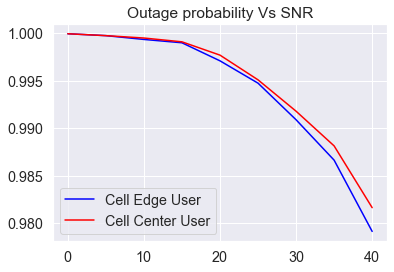

In [ ]:
norm_p_CCU = p_CCU
norm_p_CEU = p_CEU
xpoints = np.array(F)
ypoints = np.array(p_CEU)
zpoints = np.array(p_CCU)
print(F)
print(p_CEU)
plt.title("Outage probability Vs SNR")
plt.plot(xpoints,ypoints,'blue',label='Cell Edge User')
plt.plot(xpoints,zpoints,'red',label='Cell Center User')
plt.legend()
plt.show()

[0, 5, 10, 15, 20, 25, 30, 35, 40]
[0.99995, 0.99975, 0.9995, 0.9991, 0.9977, 0.9951, 0.9918, 0.98815, 0.98165]


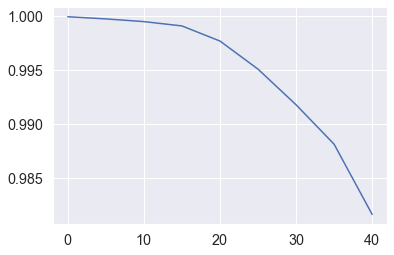

In [ ]:
xpoints = np.array(F)
ypoints = np.array(p_CCU)
print(F)
print(p_CCU)

plt.plot(xpoints,ypoints)
plt.show()

# Linear Regression

In [ ]:
import pandas as pd
data = pd.read_csv('noma.csv')
data

,tree,building,human,car,Coverage,power
0,1,1,1,1,1,0.65
1,1,1,0,0,1,0.30
2,0,0,0,1,1,0.20
3,0,1,1,1,1,0.50
4,0,0,1,1,1,0.30
...,...,...,...,...,...,...
104,1,0,0,1,1,0.30
105,0,0,0,1,1,0.20
106,1,1,1,1,1,0.65
107,0,0,0,0,1,0.10


In [ ]:
p= list(df['power'])

<AxesSubplot:>

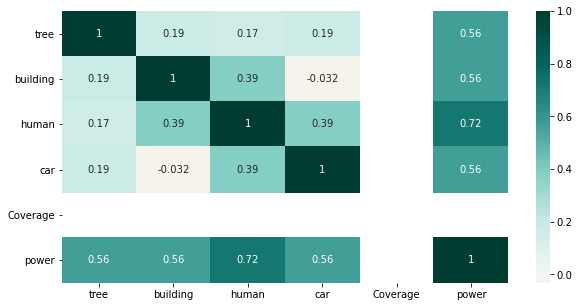

In [ ]:
corr_matrix=data.corr()
plt.figure(1, figsize=(10,5))
sns.heatmap(corr_matrix, cmap='BrBG', center=0, annot=True)

In [ ]:
X = data[['tree','building','human','car']]
y = data['power']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions = lm.predict(X_test)

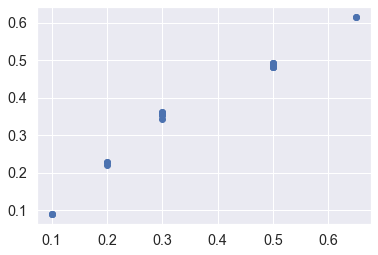

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.02612830434776338
MSE: 0.0009694944835392932
RMSE: 0.031136706369481234


In [ ]:
print("Accuracy:- ",lm.score(X_test, y_test)*100)

Accuracy:-  96.66024676133084


In [ ]:
data_test = pd.read_csv('noma_test.csv')

In [ ]:
X_test = data_test[['tree','building','human','car']]
y_test = data_test['power']

In [ ]:
predictions = lm.predict(X_test)
predictions

array([0.08837052, 0.21922243, 0.3434428 , 0.4826093 , 0.61567662,
       0.36060435, 0.08837052, 0.22143785, 0.35175739, 0.4826093 ])

In [ ]:
p_CCU = []
p_CEU = []
p_SNR = []
x = random.randint(0,500)
y = random.randint(0,500)
final_SNR = []
iter=20000
for j in range(0,9):

          out = []
          out_CEU = []
          for i in range(1,iter):
                x1 = random.randint(x-10,x+10)
                x2 = random.randint(x-10,x+10)

                y1 = random.randint(y-10,y+10)
                y2 = random.randint(y-10,y+10)

                if(x==x1):
                    x1 = random.randint(x-10,x+10)

                if(x==x2):
                    x2 = random.randint(x-10,x+10)

                if(y==y1):
                    y1 = random.randint(x-10,x+10)

                if(y==y2):
                    y2 = random.randint(x-10,x+10)


                h1 = np.random.exponential(scale=1.0, size=1)
                h2=h1

                p = pow(x-x1,2)
                q = pow(y-y1,2)
                d1 = math.sqrt(p+q)
                  # DISTANCE USER 2
                p = pow(x-x2,2)
                q = pow(y-y2,2)
                d2 = math.sqrt(p+q)



                # TOTAL CHANNEL GAIN

                T1 = h1 * pow(d1,-3)
                T2 = h2 * pow(d2,-3)

                T1_CCU = 0
                T2_CEU = 0

                if (T1>T2):
                  T1_CCU = T1
                  T2_CEU = T2

                elif(T2>T1) :
                  T1_CCU = T2
                  T2_CEU = T1

                else:
                  pass


                SNR_CCU = f_act[j]*T1_CCU*predictions[4]
                SNR_CEU = (f_act[j]*T2_CEU*(1-predictions[4]))/1+(f_act[j]*T1_CCU*predictions[4])
               # p_SNR.append(SNR_CEU)

                x_CCU = math.log(1+SNR_CCU,2)
                x_CEU = math.log(1+SNR_CEU,2)



                if(x_CCU < 0.1):
                     out.append(1)

                else:
                     out.append(0)


                if(x_CEU < 0.1):
                  out_CEU.append(1)
                else :
                  out_CEU.append(0)

          t = sum(out)/iter
          p_CCU.append(t)

          o = sum(out_CEU)/iter
          p_CEU.append(o)






print(p_CCU)
print(p_CEU)

[0.99865, 0.99625, 0.9935, 0.98985, 0.9879, 0.98155, 0.9716, 0.96365, 0.9485]
[0.99855, 0.99625, 0.99335, 0.9897, 0.9877, 0.9809, 0.9708, 0.96225, 0.9455]


COMPARISION OF NORMAL CCU AND PREDICTED CCU

[0, 5, 10, 15, 20, 25, 30, 35, 40]
[0.99855, 0.99625, 0.99335, 0.9897, 0.9877, 0.9809, 0.9708, 0.96225, 0.9455]


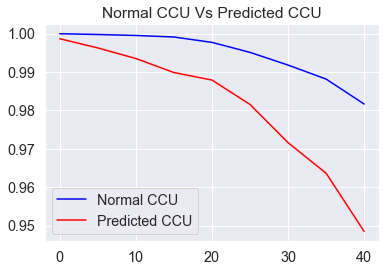

In [ ]:
#Comparison of normal CCU and predicted CCU
xpoints = np.array(F)
ypoints = np.array(norm_p_CCU)
zpoints = np.array(p_CCU)
print(F)
print(p_CEU)
plt.title("Normal CCU Vs Predicted CCU")
plt.plot(xpoints,ypoints,'blue',label='Normal CCU')
plt.plot(xpoints,zpoints,'red',label='Predicted CCU')
plt.legend()
plt.show()

COMPARISION OF NORMAL CEU AND PREDICTED CEU

[0, 5, 10, 15, 20, 25, 30, 35, 40]
[0.99855, 0.99625, 0.99335, 0.9897, 0.9877, 0.9809, 0.9708, 0.96225, 0.9455]


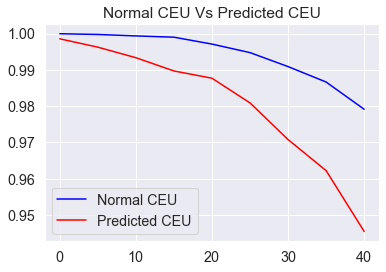

In [ ]:
#Comparison of normal CEU and predicted CEU
xpoints = np.array(F)
ypoints = np.array(norm_p_CEU)
zpoints = np.array(p_CEU)
print(F)
print(p_CEU)
plt.title("Normal CEU Vs Predicted CEU")
plt.plot(xpoints,ypoints,'blue',label='Normal CEU')
plt.plot(xpoints,zpoints,'red',label='Predicted CEU')
plt.legend()
plt.show()

In [ ]:
car = list(data['car'])
building = list(data['building'])
human = list(data['human'])
tree = list(data['tree'])

In [ ]:
c = sum(car)
b = sum(building)
h = sum(human)
t = sum(tree)


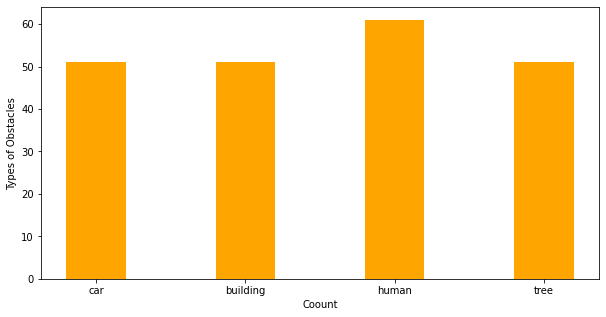

In [ ]:

import numpy as np

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
c_name = ['car','building','human','tree']
c_no = [c,b,h,t]
plt.bar(c_name, c_no, color ='orange',
        width = 0.4)

plt.xlabel("Coount")
plt.ylabel("Types of Obstacles")
plt.show()

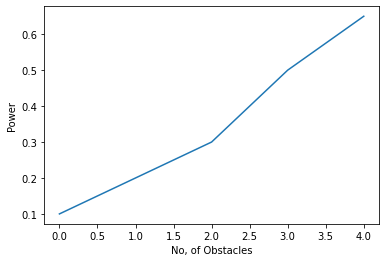

In [ ]:
y = [0.1,0.2,0.3,0.5,0.65]
x = [0,1,2,3,4]
plt.plot(x, y)
plt.xlabel("No, of Obstacles")  # add X-axis label
plt.ylabel("Power")  # add Y-axis label
plt.show()

# SVM

In [ ]:
data['power'] = data['power']*100

X_t = data[['tree','building','human','car']]
y_t = data['power']




from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_t, y_t)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred = y_pred/100

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [ ]:
print("Accuracy :- ",score*100)

Accuracy :-  100.0


# Decision Tree

In [ ]:
X = data[['tree','building','human','car']]
y = data['power']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth =3, random_state = 42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
test_pred_decision_tree = clf.predict(X_test)

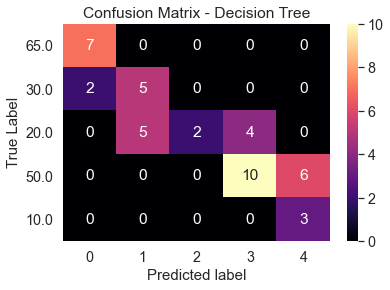

<Figure size 720x504 with 0 Axes>

In [ ]:
from sklearn import metrics

import seaborn as sns

import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test,test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()

sns.set(font_scale=1.3)

plt.figure(figsize=(10,7))

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Decision Tree')

ax.set_xlabel("Predicted label", fontsize =15)



ax.set_ylabel("True Label", fontsize=15)

ax.set_yticklabels(list(labels), rotation = 0)

plt.show()

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,test_pred_decision_tree)
print("Accuracy :- ",score*100)

Accuracy :-  70.85696139363971
